### Introduction
Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

- **Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
- **Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight
- **Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

In this tutorial, we’ll take a closer look at LDA, and implement our first topic model using the sklearn implementation in python 2.7

### Theoretical Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

![LDA_Model](https://github.com/chdoig/pytexas2015-topic-modeling/blob/master/images/lda-4.png?raw=true)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

### The process
- We pick the number of topics ahead of time even if we’re not sure what the topics are.
- Each document is represented as a distribution over topics.
- Each topic is represented as a distribution over words.

### LDA Implementation

1. Loading data
2. Data cleaning
3. Exploratory analysis
4. Preparing data for LDA analysis
5. Model Evaluation and parameter tuning

#### Loading data


Let’s start by looking at the content of the file

In [1]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Importing modules
%load_ext autotime

# Importar librerias
import pandas as pd

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)
import os

#Importar los datasets
url_reddit = 'https://raw.githubusercontent.com/jjiguaran/text_mining/master/Data/RedditNews.csv'
url_combined = 'https://raw.githubusercontent.com/jjiguaran/text_mining/master/Data/Combined_News_DJIA.csv'
RedditNews = pd.read_csv(url_reddit)
CombinedNews = pd.read_csv(url_combined)


RedditNews['Date'] =  pd.to_datetime(RedditNews['Date'], format='%Y-%m-%d')
CombinedNews['Date'] =  pd.to_datetime(CombinedNews['Date'], format='%Y-%m-%d')


In [3]:
## Nos quedamos con las fechas del dataset que está etiquetado
RedditNews = RedditNews[RedditNews['Date'].isin(CombinedNews['Date'])]

display(
    CombinedNews['Date'].nunique(),
    RedditNews['Date'].nunique() )

1989

1989

time: 64 ms


In [4]:
CombinedNews.drop(columns=['Label'], inplace=True)
CombinedNews.set_index('Date', inplace=True)
CombinedNews.fillna('', inplace=True)

cols = CombinedNews.columns


CombinedNews.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


time: 289 ms


In [5]:
CombinedNews[CombinedNews['Top1'].str.contains('year')]

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-15,"b""Mom of missing gay man: Too bad he's not a 2...","b""Russia: U.S. Poland Missile Deal Won't Go 'U...","b""The government has been accused of creating ...",b'The Italian government has lashed out at an ...,b'Gorbachev: Georgia started conflict in S. Os...,"b""China fakes more than your girlfriend; 'Ethn...","b""The UN's criticism of freedom of expression ...",b'Russian general threatens nuclear strike on ...,b'Russia can inspect Polish missile defence site',b'Russia-Georgia Conflict Fueled by Rush to Co...,"b""Business Week: Victory in Georgia gives Russ...","b""Under Soviet rule we didn't believe a word o...",b'Ministers have been accused of building a na...,"b""Russia: Georgia can 'forget' regaining provi...","b""Russians 'Seize US Weapons Depot' in Georgia""",b'Why are redditors generally supportive of Ru...,b'Johann Hari: We need to stop being such cowa...,b'US officials have said that their military p...,b'Israel clears troops who killed Reuters came...,b'Unenforceable laws encourage cops to escalat...,b'What Chinese pollution really looks like',"b'Hacker Kidnaps and Tortures Informant, Posts...",b'Bush Tells Putin: This Aggression Will Not S...,b'Georgia is all about the oil pipelines',b'Rivals say they plan to remove Georgian pres...
2008-08-18,"b'In an Afghan prison, the majority of female ...","b""Little girl, you're not ugly; they are""","b""Pakistan's Musharraf to Resign, Leave the Co...","b'Tornado throws a bus in Poland, captured by ...","b""Britain's terror laws have left me and my fa...","b""Iran 'fires satellite into space'""",b'Rights of Non-Muslims restricted by new Mald...,b'Tour of Tskhinvali undercuts Russian version...,"b'The Great Resource War is already underway, ...","b'Over 190,000 US contractors working in Iraq'",b'Russia moves SS-21 missiles into Georgia: US...,"b'a President says he is resigning ""to avoid a...","b'""Democratic"" Georgia shuts down an oppositio...",b'New Cold War is an option -- Russian parliam...,b'Georgian Situation Continues the Quest for T...,b'MI5 seeks gay spies',b' New porn channel lets Canadians strut their...,b'The Dangerous Neighbor: Vladimir Putin Takes...,b'Israel opinion page: Russians are saner.',"b""NATO's Hour""",b'Georgian President Saakashvili Eats His Tie ...,b'No Chicken Left Behind: Animal RFID Surveill...,b'Putin has given us an order that everyone mu...,b'National DNA database grows on the genes of ...,b'Mayor Asks Ugly Women To Visit His Town'
2008-08-20,b'Two elderly Chinese women have been sentence...,b'The Power of Islam: The Human Rights Council...,"b""We had 55 times more mil

time: 610 ms


#### Data Cleaning

Since the goal of this analysis is to perform topic modeling, we will solely focus on the text data from each paper, and drop other metadata columns

In [6]:
for col in cols: ## Hay error en la codificación de caracteres especiales, encontré ese, pero hay que ver que otros surgen
    CombinedNews[col] = CombinedNews[col].str.replace('&amp;', '&')

time: 186 ms


In [7]:
for col in cols:

    CombinedNews[col] = CombinedNews[col].str.replace('^b\"', " ", regex=True)
    CombinedNews[col] = CombinedNews[col].str.replace("^b\'", " ", regex=True)
    CombinedNews[col] = CombinedNews[col].str.replace("year.old", " year old ", regex=True)
    CombinedNews[col] = CombinedNews[col].str.replace("\d year", " year ", regex=True)

time: 1.84 s


#### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of paper_text column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [8]:
##Una función para limpieza básica, podemos añadir cosas, es un solo una base, luego lo adaptamos más a nuestro uso

import re

REPLACE_BY_SPACE_RE = re.compile(r'[/(){}\[\]\|@,;-]')
BAD_SYMBOLS_RE = re.compile(r'[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub('', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text

for col in cols:
    CombinedNews[col] = CombinedNews[col].apply(clean_text)
CombinedNews.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2008-08-08,georgia downs two russian warplanes as countr...,breaking musharraf to be impeached,russia today columns of troops roll into sout...,russian tanks are moving towards the capital ...,afghan children raped with impunity un offici...,150 russian tanks have entered south ossetia ...,breaking georgia invades south ossetia russia...,the enemy combatent trials are nothing but a ...,georgian troops retreat from s osettain capit...,did the us prep georgia for war with russia,rice gives green light for israel to attack i...,announcingclass action lawsuit on behalf of a...,sorussia and georgia are at war and the nyts ...,china tells bush to stay out of other countri...,did world war iii start today,georgia invades south ossetia if russia gets...,alqaeda faces islamist backlash,condoleezza rice the us would not act to prev...,this is a busy day the european union has ap...,georgia will withdraw 1000 soldiers from iraq...,why the pentagon thinks attacking iran is a b...,caucasus in crisis georgia invades south ossetia,indian shoe manufactory and again in a seri...,visitors suffering from mental illnesses bann...,no help for mexicos kidnapping surge
2008-08-11,why wont america and nato help us if they won...,bush puts foot down on georgian conflict,jewish georgian minister thanks to israeli tr...,georgian army flees in disarray as russians a...,olympic opening ceremony fireworks faked,what were the mossad with fraudulent new zeal...,russia angered by israeli military sale to ge...,an american citizen living in sossetia blames...,welcome to world war iv now in high definition,georgias move a mistake of monumental proport...,russia presses deeper into georgia us says re...,abhinav bindra wins first ever individual oly...,us ship heads for arctic to define territory,drivers in a jerusalem taxi station threaten ...,the french team is stunned by phelps and the ...,israel and the us behind the georgian aggression,do not believe tv neither russian nor georgia...,riots are still going on in montreal canada b...,china to overtake us as largest manufacturer,war in south ossetia pics,israeli physicians group condemns state torture,russia has just beaten the united states ove...,perhaps the question about the georgia russi...,russia is so much better at war,so this is what its come to trading sex for food
2008-08-12,remember that adorable 9 year old who sang a...,russia ends georgia operation,if we had no sexual harassment we would have ...,alqaeda is losing support in iraq because of ...,ceasefire in georgia putin outmaneuvers the west,why microsoft and intel tried to kill the xo ...,stratfor the russogeorgian war and the balanc...,im trying to get a sense of this whole georgi...,the us military was surprised by the timing a...,us beats war drum as iran dumps the dollar,gorbachev georgian military attacked the sout...,cnn use footage of tskhinvali ruins to cover ...,beginning a war as the olympics were opening ...,55 pyramids as large as the luxor stacked int...,the 11 top party cities in the world,us troops still in georgia did you know they ...,why russias response to georgia was right,gorbachev accuses us of making a serious blun...,russia georgia and nato cold war two,remember that adorable 62 year old who led y...,war in georgia the israeli connection,all signs point to the us encouraging georgia...,christopher king argues that the us and nato ...,america the new mexico,bbc news asiapacific extinction by man not ...
2008-08-13,us refuses israel weapons to attack iran report,when the president ordered to attack tskhinva...,israel clears troops who killed reuters came...,britains policy of being tough on drugs is po...,body of 14 year old found in trunk latest r...,china has moved 10 million quake survivors in...,bush announces operation get all up in russia...,russian

time: 709 ms


In [9]:
CombinedNews['News_day'] = CombinedNews[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
CombinedNews.drop(columns=cols, inplace=True)
CombinedNews

,News_day
Date,
2008-08-08,georgia downs two russian warplanes as countr...
2008-08-11,why wont america and nato help us if they won...
2008-08-12,remember that adorable 9 year old who sang a...
2008-08-13,us refuses israel weapons to attack iran rep...
2008-08-14,all the experts admit that we should legalise...
2008-08-15,mom of missing gay man too bad hes not a 21 y...
2008-08-18,in an afghan prison the majority of female pr...
2008-08-19,man arrested and locked up for five hours aft...
2008-08-20,two elderly chinese women have been sentenced...


time: 474 ms


#### Exploratory Analysis

To verify whether the preprocessing happened correctly, we’ll make a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

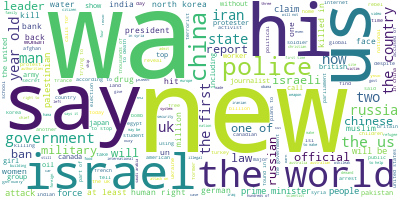

time: 30 s


In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(CombinedNews['News_day'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

#### Prepare text for LDA analysis

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by converting the documents into a simple vector representation (Bag of Words BOW). Next, we will convert a list of titles into lists of vectors, all with length equal to the vocabulary.

We’ll then plot the ten most frequent words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.

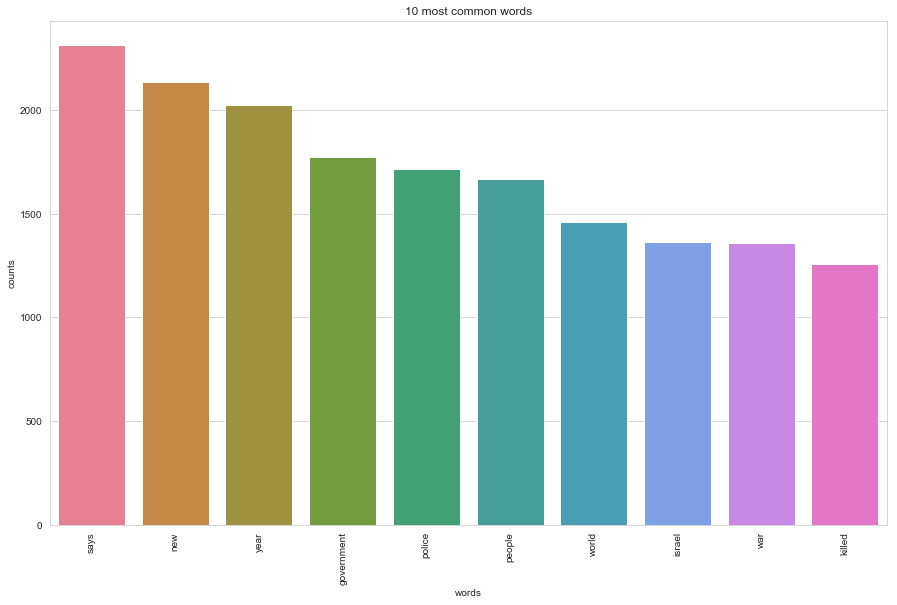

time: 12.2 s


In [11]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(CombinedNews['News_day'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Analyzing our LDA model

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.
For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [9]:
# !pip install gensim
# !pip install PyLDAvis
# !pip install spacy
# !python -m spacy download en_core_web_sm

time: 999 µs


#### Tokenize words and further clean-up text
Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [14]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = CombinedNews.News_day.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['georgia', 'downs', 'two', 'russian', 'warplanes', 'as', 'countries', 'move', 'to', 'brink', 'of', 'war_', 'breaking', 'musharraf', 'to', 'be', 'impeached_', 'russia', 'today', 'columns', 'of', 'troops', 'roll', 'into', 'south', 'ossetia', 'footage', 'from', 'fighting', 'youtube_']
time: 9 s


#### Creating Bigram and Trigram Models
Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. Some examples in our example are: 'back_bumper', 'oil_leakage', 'maryland_college_park' etc.

Gensim's Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold.

In [15]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

time: 1min 1s


#### Remove Stopwords, Make Bigrams and Lemmatize
The phrase models are ready. Let’s define the functions to remove the stopwords, make trigrams and lemmatization and call them sequentially.

In [16]:
# NLTK Stop words
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

time: 6 s


In [17]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

time: 5 ms


In [18]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['georgia', 'down', 'russian', 'warplane', 'country', 'move', 'brink', 'war', '_', 'break', 'musharraf', 'impeach', '_', 'russia', 'today', 'column', 'troop', 'roll', 'south_ossetia', 'footage', 'fighting', 'youtube', '_', 'russian', 'tank', 'move', 'capital', 'south_ossetia', 'reportedly', 'completely']
time: 3min 35s


### Data transformation: Corpus and Dictionary
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.
First, we are creating a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use.

In [19]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print(len(id2word))
id2word.filter_extremes(no_below=5, no_above=0.5)
print(len(id2word))


# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

49135
8620
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
time: 3.6 s


In [20]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
id2word.save('dictionary.gensim')

time: 239 ms


### Building the base topic model
We have everything required to train the base LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well. Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior (we'll use default for the base model).

chunksize controls how many documents are processed at a time in the training algorithm. Increasing chunksize will speed up training, at least as long as the chunk of documents easily fit into memory.

passes controls how often we train the model on the entire corpus (set to 10). Another word for passes might be "epochs". iterations is somewhat technical, but essentially it controls how often we repeat a particular loop over each document. It is important to set the number of "passes" and "iterations" high enough.

In [21]:
NUM_TOPICS = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS, 
                                       random_state=100,
                                       chunksize=1000,
                                       passes=10,
                                       per_word_topics=True)

lda_model.save('model5.gensim')

time: 3min 4s


In [22]:
print("Topics found via LDA:")

from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

Topics found via LDA:
[(0,
  '0.005*"find" + 0.004*"ban" + 0.004*"report" + 0.004*"attack" + 0.003*"call" '
  '+ 0.003*"could" + 0.003*"make" + 0.003*"child" + 0.003*"nuclear" + '
  '0.003*"man"'),
 (1,
  '0.006*"israel" + 0.006*"israeli" + 0.006*"gaza" + 0.005*"attack" + '
  '0.004*"china" + 0.004*"war" + 0.004*"find" + 0.004*"woman" + 0.003*"take" + '
  '0.003*"man"'),
 (2,
  '0.005*"russian" + 0.004*"call" + 0.004*"russia" + 0.003*"find" + '
  '0.003*"not" + 0.003*"official" + 0.003*"military" + 0.003*"first" + '
  '0.003*"ukraine" + 0.003*"president"'),
 (3,
  '0.005*"not" + 0.005*"israel" + 0.004*"israeli" + 0.004*"palestinian" + '
  '0.004*"protest" + 0.004*"war" + 0.004*"man" + 0.003*"take" + 0.003*"china" '
  '+ 0.003*"state"'),
 (4,
  '0.004*"attack" + 0.004*"woman" + 0.004*"not" + 0.004*"china" + 0.003*"iran" '
  '+ 0.003*"man" + 0.003*"first" + 0.003*"call" + 0.003*"force" + 0.003*"ban"')]
time: 199 ms


### What is Topic Coherence?
Perplexity is often used as an example of an intrinsic evaluation measure. It comes from the language modeling community and aims to capture how surprised a model is of new data it has not seen before. It is measured as the normalized log-likelihood of a held-out test set.

Focussing on the log-likelihood part, you can think of the perplexity metric as measuring how probable some new unseen data is given the model that was learned earlier. That is to say, how well does the model represent or reproduce the statistics of the held-out data.

However, past research has shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated. And that served as a motivation for more work trying to model the human judgment, and thus Topic Coherence.

The topic coherence concept combines a number of papers into one framework that allows evaluating the coherence of topics inferred by a topic model. But,

#### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. But,

#### What is coherence?
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is "the game is a team sport", "the game is played with a ball", "the game demands great physical efforts"

### Coherence Measures
- C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
- C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson's coherence
- C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
- C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
- C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
- C_a is baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

#### Compute Model Perplexity and Coherence Score
Let's calculate the baseline coherence score

In [23]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.23980992881263644
time: 20 s


### Hyperparameter tuning
First, let's differentiate between model hyperparameters and model parameters :

- Model hyperparameters can be thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or in our case, number of topics K
- Model parameters can be thought of as what the model learns during training, such as the weights for each word in a given topic.

Now that we have the baseline coherence score for the default LDA model, let's perform a series of sensitivity tests to help determine the following model hyperparameters:

- Number of Topics (K)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density
We'll perform these tests in sequence, one parameter at a time by keeping others constant and run them over the two difference validation corpus sets. We'll use C_v as our choice of metric for performance comparison

In [24]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=15,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

time: 3 ms


Let's call the function, and iterate it over the range of topics, alpha, and beta parameter values


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
alpha.append('auto')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
beta.append('auto')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]

corpus_title = ['100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  6%|████▏                                                                      | 19/336 [1:06:25<17:48:48, 202.30s/it]

### Final Model Training
Based on external evaluation (Code to be added from Excel based analysis), train the final model



In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [ ]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this post addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### Sources:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
